# AMEO

#### The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_excel('/content/aspiring_minds_employability_outcomes_2015.xlsx')

In [3]:
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
df.shape

(3998, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [8]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

There are no null values in the dataset

In [9]:
df.drop(['Unnamed: 0','ID','10board','12board','CollegeID','CollegeCityID'],axis=1,inplace=True)
df.head()

Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01              present   senior quality engineer   
1   500000 2013-09-01              present         assistant manager   
2   325000 2014-06-01              present          systems engineer   
3  1100000 2011-07-01              present  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage  12graduation  12percentage  ...  \
0  Bangalore      f 1990-02-19          84.3          2007          95.8  ...   
1     Indore      m 1989-10-04          85.4          2007          85.0  ...   
2    Chennai      f 1992-08-03          85.0          2010          68.2  ...   
3    Gurgaon      m 1989-12-05          85.6          2007          83.6  ...   
4    Manesar      m 1991-02-27          78.0          2008          76.8  ...   

   ComputerScience MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1             -1             -1           -1         -1   
1               -1             -1             -1           -1         -1   
2               -1             -1             -1           -1         -1   
3               -1             -1             -1           -1         -1   
4               -1             -1             -1           -1         -1   

  conscientiousness  agreeableness  extraversion  nueroticism  \
0            0.9737         0.8128        0.5269      1.35490   
1           -0.7335         0.3789        1.2396     -0.10760   
2            0.2718         1.7109        0.1637     -0.86820   
3            0.0464         0.3448       -0.3440     -0.40780   
4           -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 33 columns]

In [10]:
df.shape

(3998, 33)

In [11]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '12graduation', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

# Exploratory Data Analysis

## Univariate Analysis

### Salary

In [12]:
import warnings
warnings.filterwarnings('ignore')

Skewness:6.45
Kurtosis:80.93


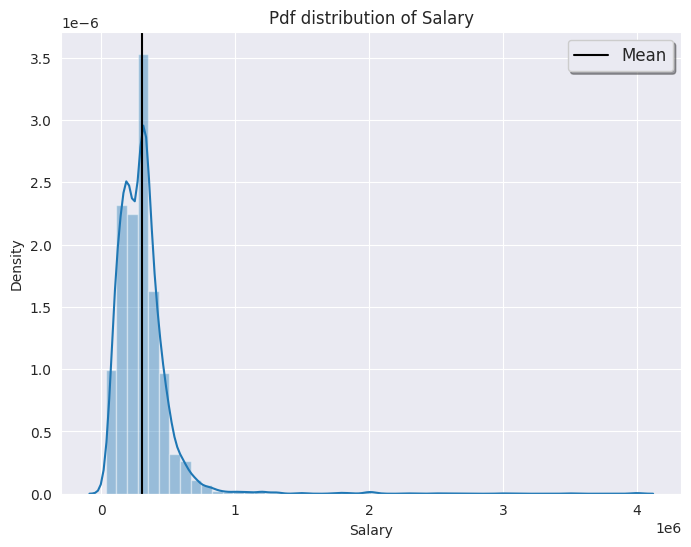

In [13]:
# PDF distribution of salary
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['Salary'])
plt.axvline(df['Salary'].mean(),color='black', label='Mean')
plt.title("Pdf distribution of Salary")
plt.legend(shadow=True,fontsize="larger")

skew = df['Salary'].skew()
kurt = df['Salary'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

<Axes: >

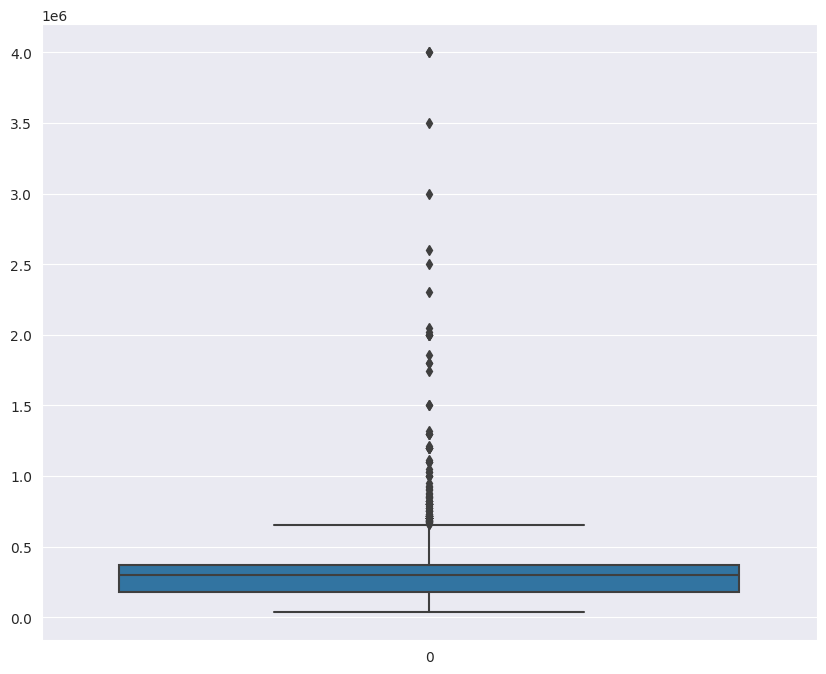

In [14]:
#boxplot
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Salary'])

There are few outliers in the salary column

In [15]:
# outliers
df['Salary'][df['Salary'] > 1000000].reset_index() 

index   Salary
0       3  1100000
1      92  1500000
2     123  1200000
3     166  1860000
4     383  1110000
5     394  1200000
6     500  2600000
7     725  1025000
8     771  1300000
9     779  3500000
10    927  1300000
11    943  1050000
12    961  2000000
13   1237  4000000
14   1239  2020000
15   1517  2050000
16   1746  1320000
17   1759  3000000
18   1982  2500000
19   2030  2300000
20   2109  1300000
21   2152  1200000
22   2182  4000000
23   2216  1800000
24   2230  1200000
25   2493  1745000
26   2541  2000000
27   2565  1800000
28   2764  1200000
29   2880  1030000
30   3126  1210000
31   3247  1500000
32   3276  1100000
33   3484  2000000
34   3490  2000000
35   3710  1100000

In [16]:
index_Names = df[ df['Salary'] > 1000000 ].index
df.drop(index_Names , inplace=True)
df.shape

(3962, 33)

<Axes: >

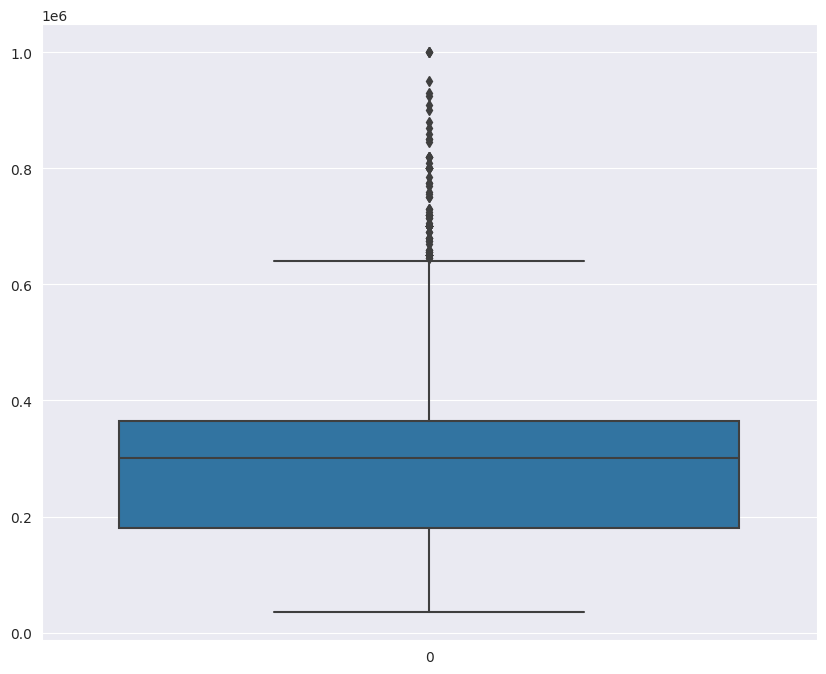

In [17]:
#boxplot after removing some outliers
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Salary'])

### Designation

In [18]:
df['Designation']

0           senior quality engineer
1                 assistant manager
2                  systems engineer
4                               get
5                   system engineer
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3962, dtype: object

In [19]:
designations = df['Designation'].unique()
len(designations) 

417

In [20]:
designation_count = df['Designation'].value_counts()
designation_count

software engineer           538
software developer          264
system engineer             205
programmer analyst          139
systems engineer            118
                           ... 
technical analyst             1
executive engg                1
manual tester                 1
process control engineer      1
jr. software developer        1
Name: Designation, Length: 417, dtype: int64

Text(0.5, 1.0, 'Job Designation of a CSE Fresher')

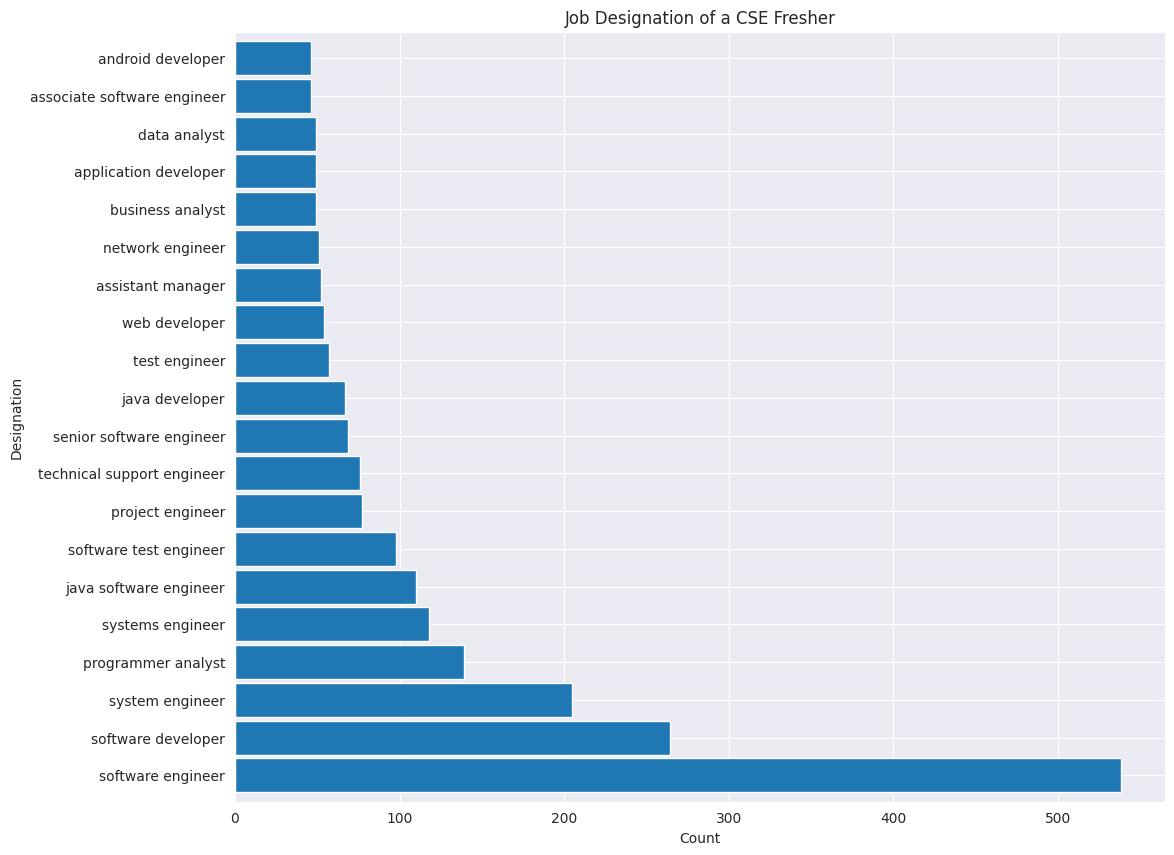

In [21]:
#Plotting the most frequent designation
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
designation_count[:20].plot(kind='barh' , width=0.9)
plt.xlabel('Count')
plt.ylabel('Designation')
plt.title('Job Designation of a CSE Fresher') 

The count of software engineers are more compared to all other designations

### Job city

In [22]:
df['JobCity']

0              Bangalore
1                 Indore
2                Chennai
4                Manesar
5              Hyderabad
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3962, dtype: object

In [23]:
jobcities = df['JobCity'].unique()
len(jobcities)

333

In [24]:
jobcities_count = df['JobCity'].value_counts()
jobcities_count

Bangalore           619
-1                  458
Noida               366
Hyderabad           333
Pune                288
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 333, dtype: int64

In [25]:
df['JobCity'].replace(-1,np.nan,inplace=True)
df['JobCity'].dropna(inplace=True)

In [26]:
jobcities_count = df['JobCity'].value_counts()
jobcities_count

Bangalore                 619
Noida                     366
Hyderabad                 333
Pune                      288
Chennai                   272
                         ... 
Salem                       1
Punchkula                   1
Gandhinagar                 1
Technopark, Trivandrum      1
Asifabadbanglore            1
Name: JobCity, Length: 332, dtype: int64

Text(0.5, 1.0, 'Preferred Cities')

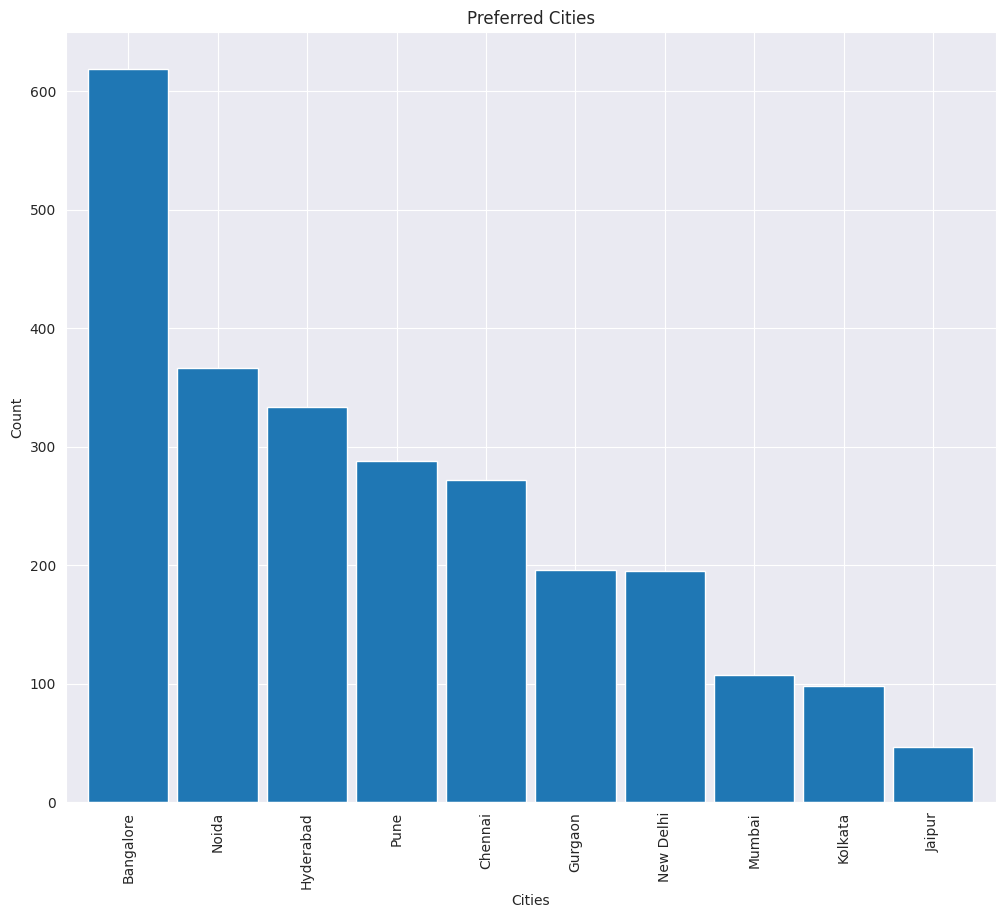

In [27]:
#Plotting the most frequent cities
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
jobcities_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Preferred Cities')

From the barplot we can say that most people choose Bangalore as their preferred work location

### Gender

In [28]:
df['Gender'].value_counts()

m    3012
f     950
Name: Gender, dtype: int64

<Axes: >

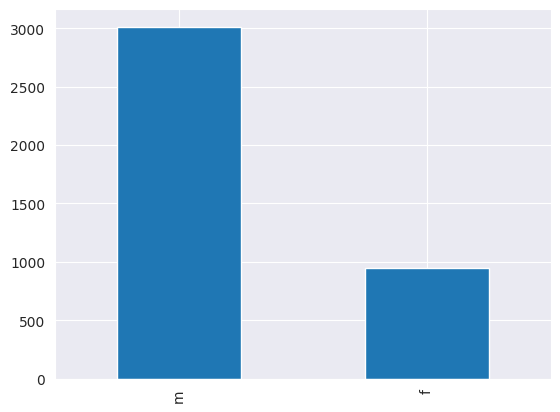

In [29]:
df['Gender'].value_counts().plot(kind = 'bar')

From the plot we can say that there are more male candidates than females

### Degree

In [30]:
df['Degree']

0       B.Tech/B.E.
1       B.Tech/B.E.
2       B.Tech/B.E.
4       B.Tech/B.E.
5       B.Tech/B.E.
           ...     
3993    B.Tech/B.E.
3994    B.Tech/B.E.
3995    B.Tech/B.E.
3996    B.Tech/B.E.
3997    B.Tech/B.E.
Name: Degree, Length: 3962, dtype: object

In [31]:
uniq_degree = df['Degree'].unique()
len(uniq_degree)

4

In [32]:
degree_count = df['Degree'].value_counts()
degree_count

B.Tech/B.E.      3669
MCA               240
M.Tech./M.E.       51
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

<Axes: >

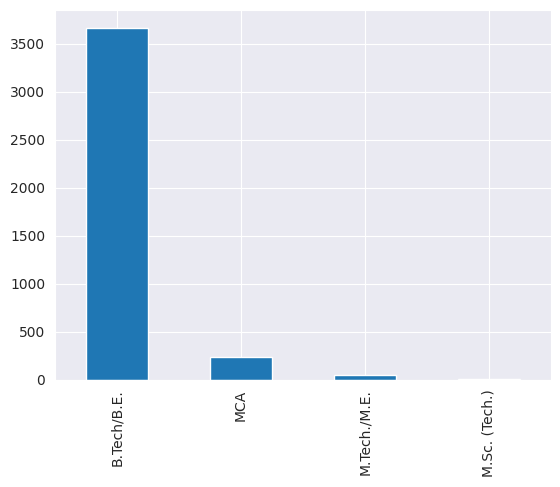

In [33]:
df['Degree'].value_counts().plot(kind = 'bar')

From the graph we can say that the most common degree is B.tech/B.E

## College State

In [34]:
df['CollegeState']

0       Andhra Pradesh
1       Madhya Pradesh
2        Uttar Pradesh
4        Uttar Pradesh
5            Karnataka
             ...      
3993           Haryana
3994         Telangana
3995            Orissa
3996         Karnataka
3997        Tamil Nadu
Name: CollegeState, Length: 3962, dtype: object

In [35]:
df['CollegeState'].value_counts()

Uttar Pradesh        905
Karnataka            369
Tamil Nadu           363
Telangana            316
Maharashtra          260
Andhra Pradesh       223
West Bengal          195
Punjab               190
Madhya Pradesh       185
Haryana              180
Rajasthan            172
Orissa               171
Delhi                160
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               23
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

<Axes: >

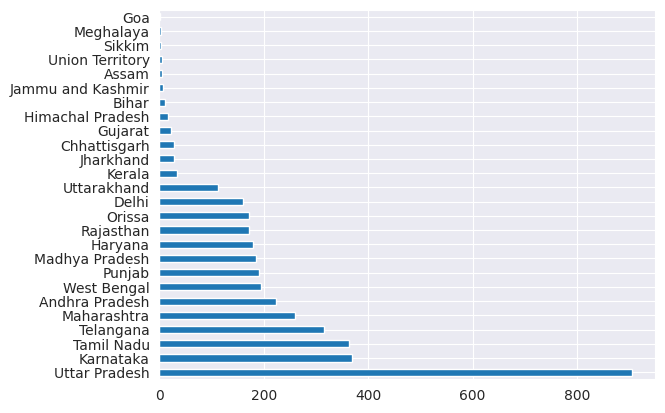

In [36]:
df['CollegeState'].value_counts().plot(kind='barh') 

From the Visualization we can say that most preferred colleges are from Uttar Pradesh

### Graduation Year

In [37]:
df['GraduationYear']

0       2011
1       2012
2       2014
4       2012
5       2014
        ... 
3993    2010
3994    2013
3995    2012
3996    2014
3997    2012
Name: GraduationYear, Length: 3962, dtype: int64

In [38]:
df['GraduationYear'].value_counts()

2013    1175
2014    1033
2012     843
2011     501
2010     278
2015      91
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

<Axes: >

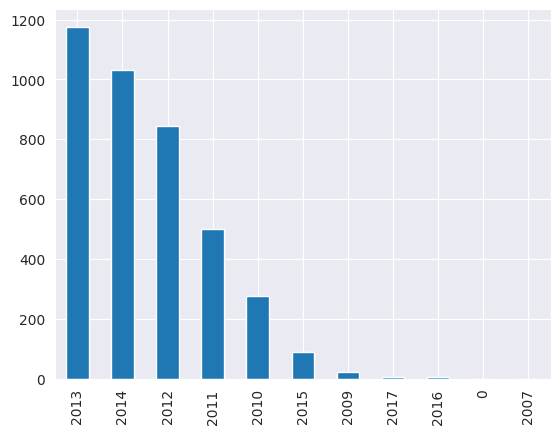

In [39]:
df['GraduationYear'].value_counts().plot(kind = 'bar')

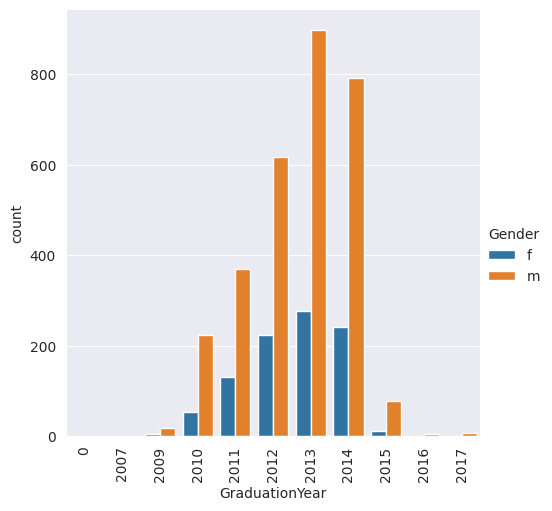

In [40]:
sns.catplot(x = "GraduationYear",hue="Gender",data = df,kind='count')
plt.xticks(rotation=90)
plt.show()

From the bar plot we can say that many candidates passed out in the year 2013

### Specialization

In [41]:
df['Specialization']

0                            computer engineering
1       electronics and communication engineering
2                          information technology
4       electronics and communication engineering
5       electronics and communication engineering
                          ...                    
3993                       information technology
3994    electronics and communication engineering
3995                         computer engineering
3996               computer science & engineering
3997                       information technology
Name: Specialization, Length: 3962, dtype: object

In [42]:
df['Specialization'].value_counts()

electronics and communication engineering      875
computer science & engineering                 739
information technology                         655
computer engineering                           592
computer application                           241
mechanical engineering                         197
electronics and electrical engineering         194
electronics & telecommunications               121
electrical engineering                          81
electronics & instrumentation eng               31
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     26
electronics engineering                         19
instrumentation and control engineering         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [43]:
len(df['Specialization'].value_counts())

46

<Axes: >

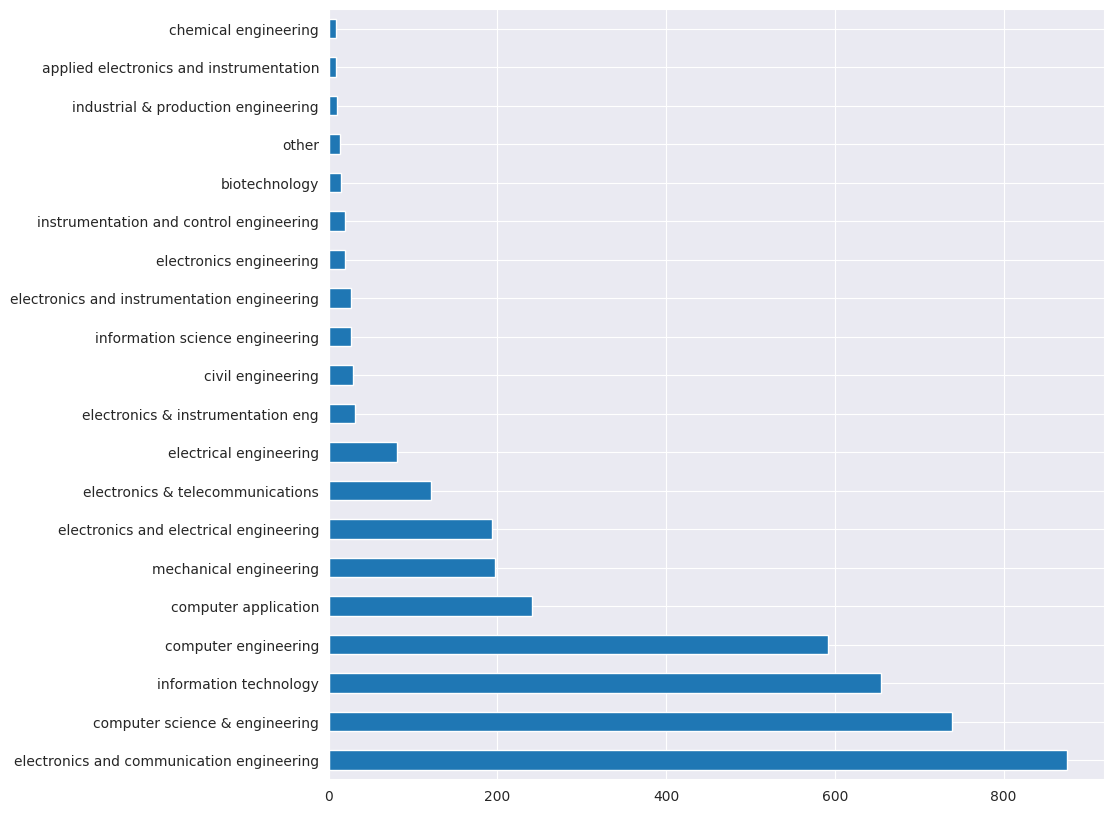

In [44]:
df['Specialization'].value_counts()[:20].plot(kind = 'barh', figsize = (10,10))

We can say that the most preferred specialization is 'Electronics and communication Engineering'

### 10th Percentage

Skewness:-0.59
Kurtosis:-0.1


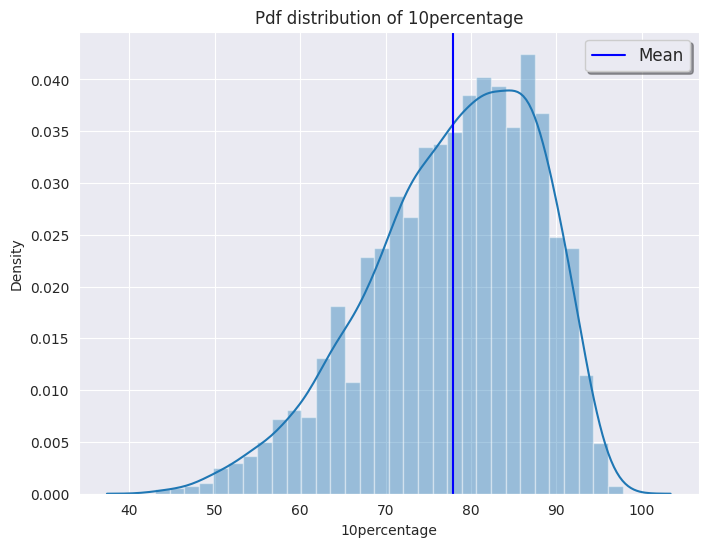

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['10percentage'])
plt.axvline(df['10percentage'].mean(), color="blue", label="Mean")
plt.title("Pdf distribution of 10percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['10percentage'].skew()
kurt = df['10percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

<Axes: >

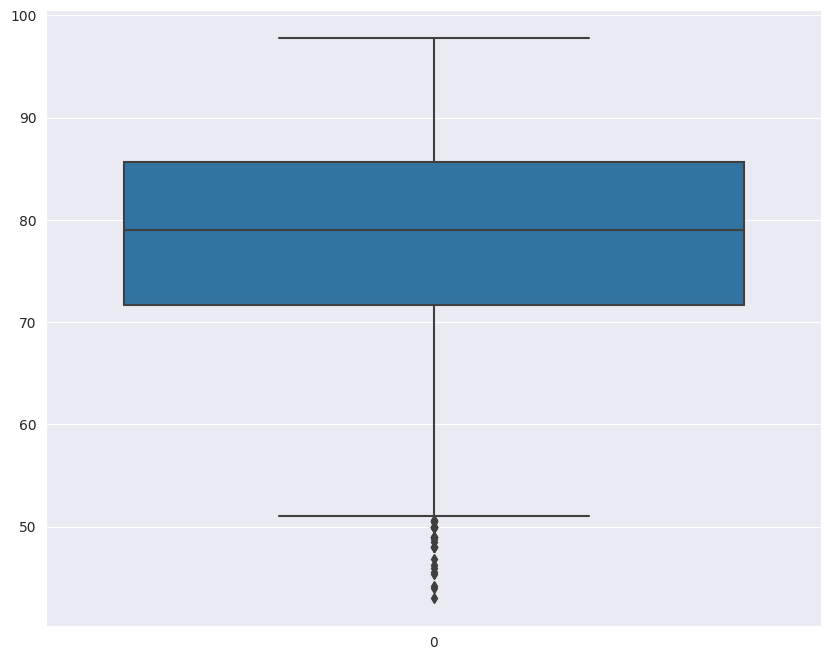

In [46]:
#boxplot
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['10percentage'])

In [47]:
# Outliers
df['10percentage'][df['10percentage']<52].reset_index()

index  10percentage
0     108         51.00
1     245         50.60
2     466         44.16
3     490         44.00
4     491         45.60
5     502         48.00
6     600         49.00
7     613         48.00
8     887         51.20
9     898         49.00
10    919         48.80
11   1064         49.00
12   1102         49.00
13   1169         48.50
14   1193         48.00
15   1235         50.60
16   1334         43.00
17   1838         50.00
18   1845         49.00
19   1955         45.33
20   1976         46.24
21   2024         51.36
22   2037         48.00
23   2123         51.00
24   2215         50.50
25   2217         51.00
26   2292         50.00
27   2432         50.00
28   2563         51.60
29   2655         50.66
30   2885         46.80
31   2982         50.00
32   3284         50.00
33   3425         50.00
34   3507         51.83
35   3525         51.42
36   3690         46.00
37   3743         49.90

In [49]:
index_Names = df[df['10percentage'] < 50 ].index
df.drop(index_Names , inplace=True)
df.shape

(3942, 33)

<Axes: >

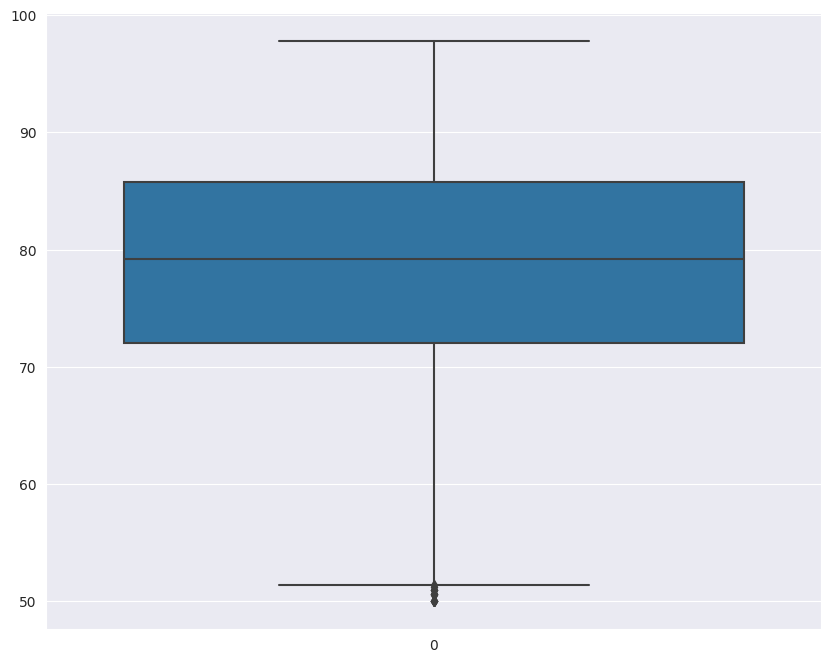

In [50]:
#boxplot after removing outliers
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['10percentage'])

### 12th Percentage

Skewness:-0.03
Kurtosis:-0.63


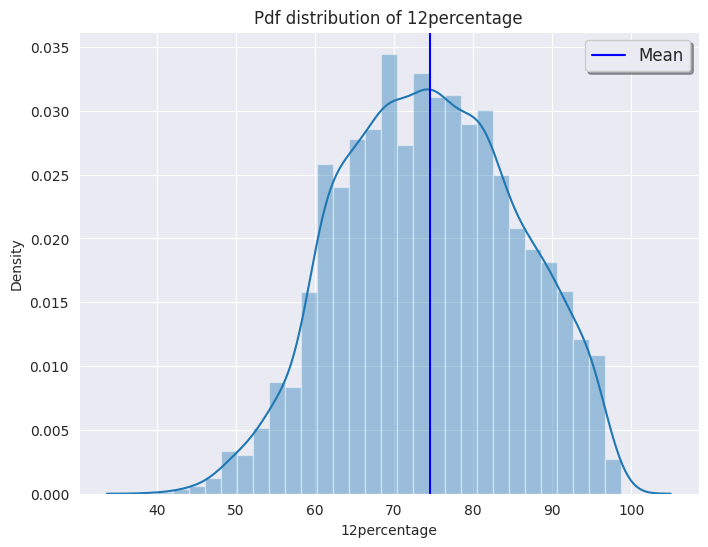

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['12percentage'])
plt.axvline(df['12percentage'].mean(), color="blue", label="Mean")
plt.title("Pdf distribution of 12percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['12percentage'].skew()
kurt = df['12percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2))) 

<Axes: >

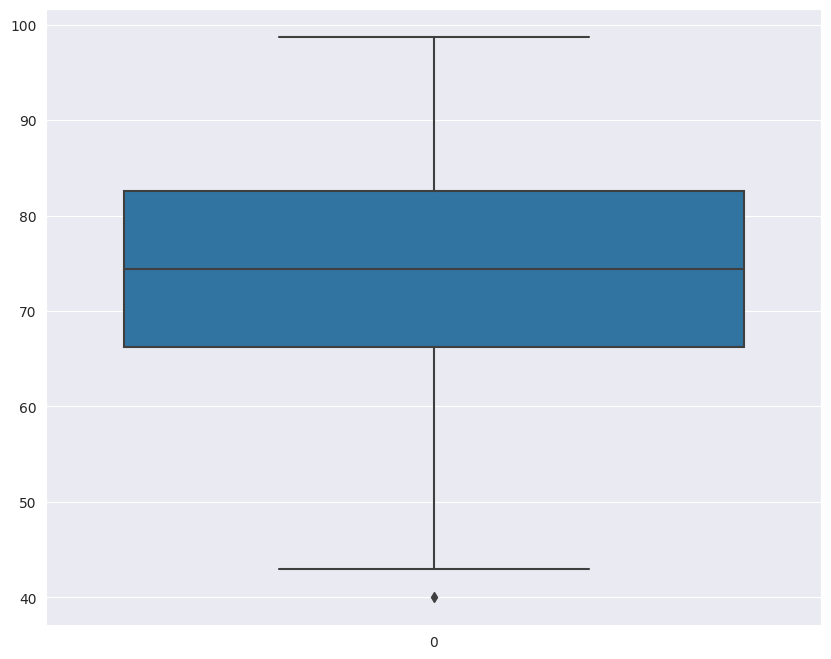

In [52]:
#boxplot
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['12percentage'])

In [53]:
# outliers
df['12percentage'][df['12percentage'] < 44].reset_index()

index  12percentage
0     23         43.42
1    413         43.12
2   1616         43.00
3   3337         40.00

In [54]:
index_Names = df[df['12percentage'] < 44 ].index
df.drop(index_Names , inplace=True)
df.shape

(3938, 33)

## College Gpa

Skewness:-1.3
Kurtosis:10.51


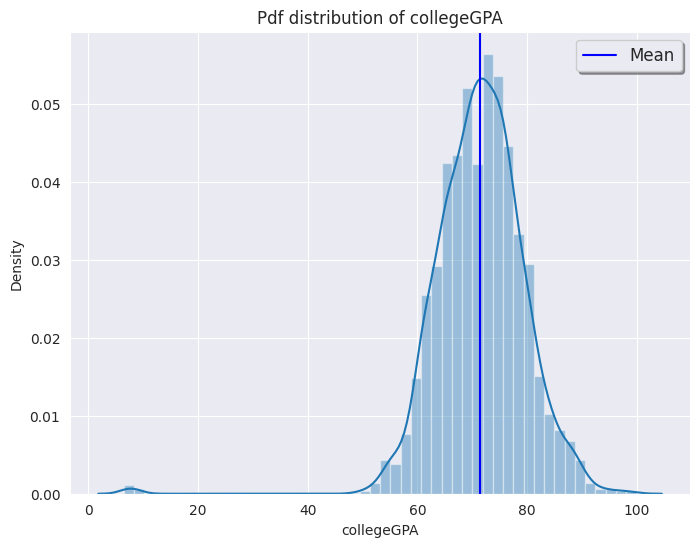

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['collegeGPA'])
plt.axvline(df['collegeGPA'].mean(), color="blue", label="Mean")
plt.title("Pdf distribution of collegeGPA")
plt.legend(shadow=True,fontsize="larger")

skew = df['collegeGPA'].skew()
kurt = df['collegeGPA'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2))) 

<Axes: >

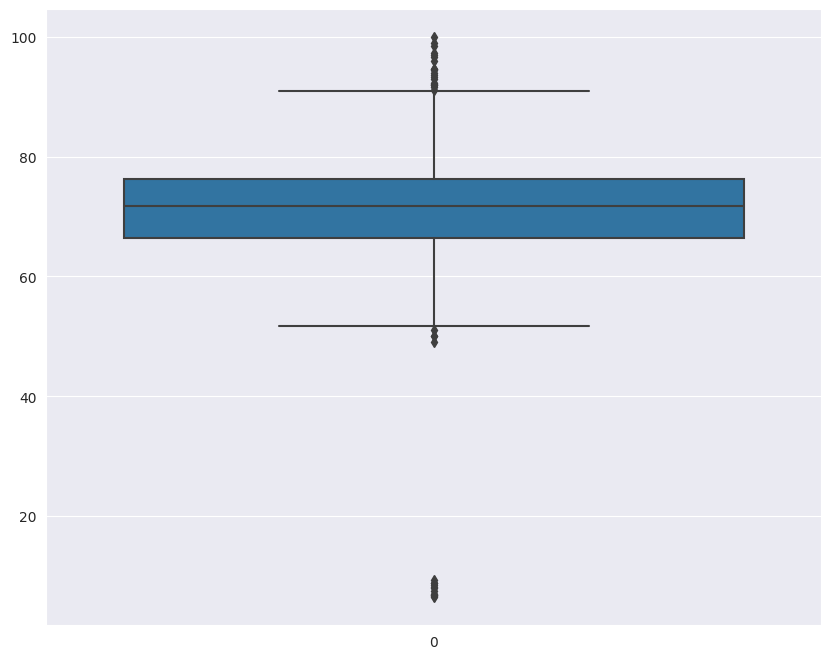

In [56]:
#boxplot
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['collegeGPA'])

In [57]:
# Outliers
df['collegeGPA'][(df['collegeGPA']<53) | (df['collegeGPA']>93)].reset_index()

index  collegeGPA
0       7        8.58
1     138        6.63
2     324       52.00
3     614       93.60
4     690       99.93
5     788        6.80
6     874       94.50
7     907       50.00
8     968       52.00
9    1134       96.00
10   1264       97.30
11   1345       93.30
12   1400       51.80
13   1419        6.85
14   1439        8.07
15   1510       96.70
16   1685       94.70
17   1767        7.56
18   2125       52.00
19   2151        6.95
20   2229        8.13
21   2293        9.30
22   2410       52.00
23   2662        8.88
24   2691        8.89
25   2703       94.00
26   2836       49.07
27   2988       94.60
28   3151       98.40
29   3293       51.00
30   3308        6.45
31   3323       96.90
32   3448       50.00
33   3590       52.00
34   3850       99.00

In [58]:
index_Names = df[df['collegeGPA'] < 57 ].index
df.drop(index_Names , inplace=True)
df.shape

(3852, 33)

<Axes: >

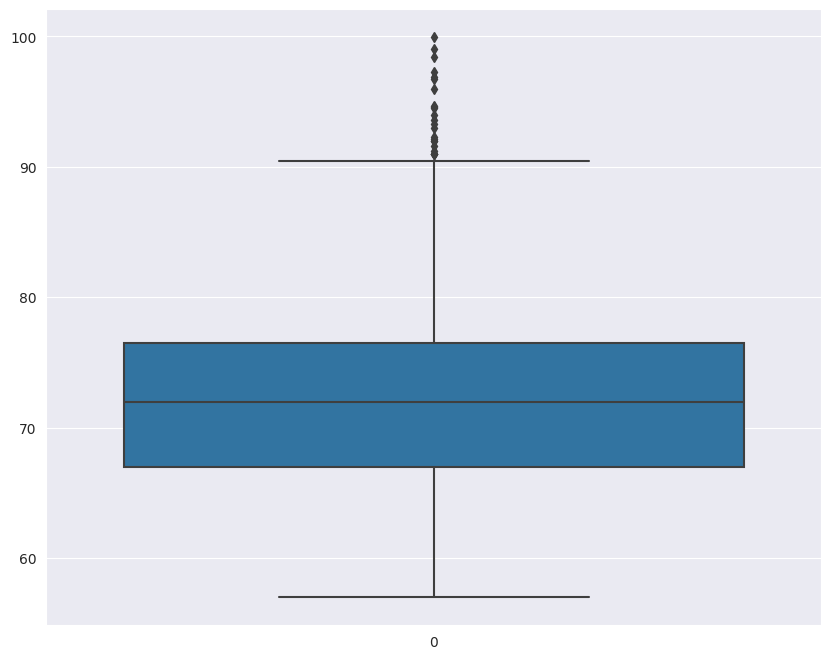

In [59]:
#boxplot
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['collegeGPA'])

In [60]:
index_Names = df[df['collegeGPA'] > 92 ].index
df.drop(index_Names , inplace=True)
df.shape

(3836, 33)

<Axes: >

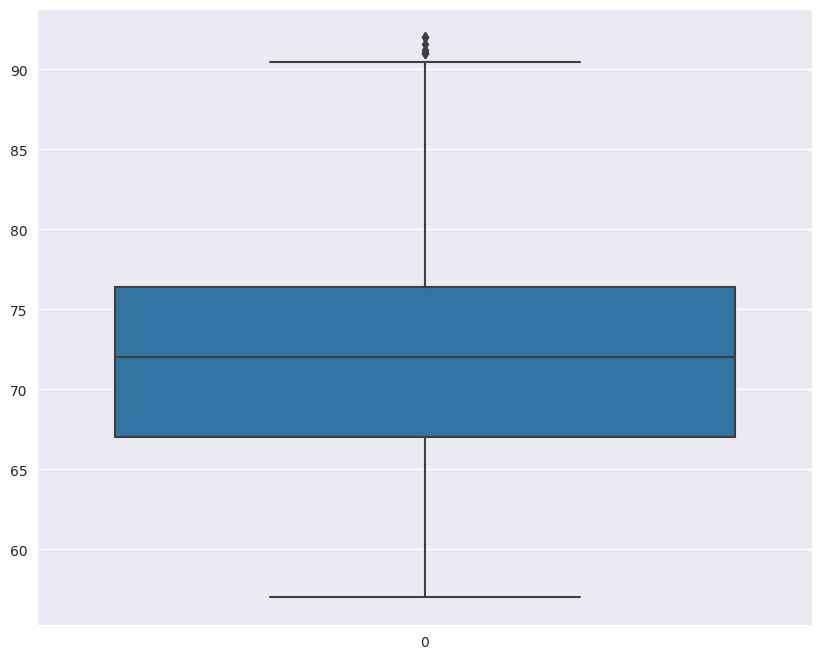

In [61]:
#boxplot after removing outliers
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['collegeGPA'])

## English

<Axes: >

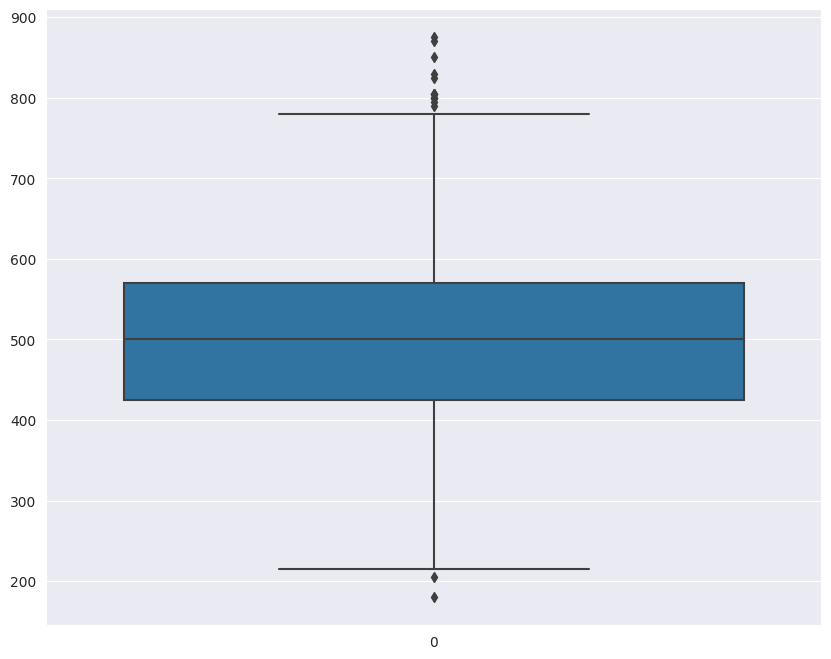

In [62]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['English'])

In [63]:
# Outliers
df['English'][(df['English']<220) | (df['English']>790)].reset_index()

index  English
0     275      875
1     444      825
2     624      215
3     668      870
4     847      800
5     935      205
6    1183      805
7    1217      180
8    1450      830
9    1519      795
10   2077      800
11   2122      800
12   2273      215
13   2385      805
14   2596      805
15   3044      850

## Quant Column

<Axes: >

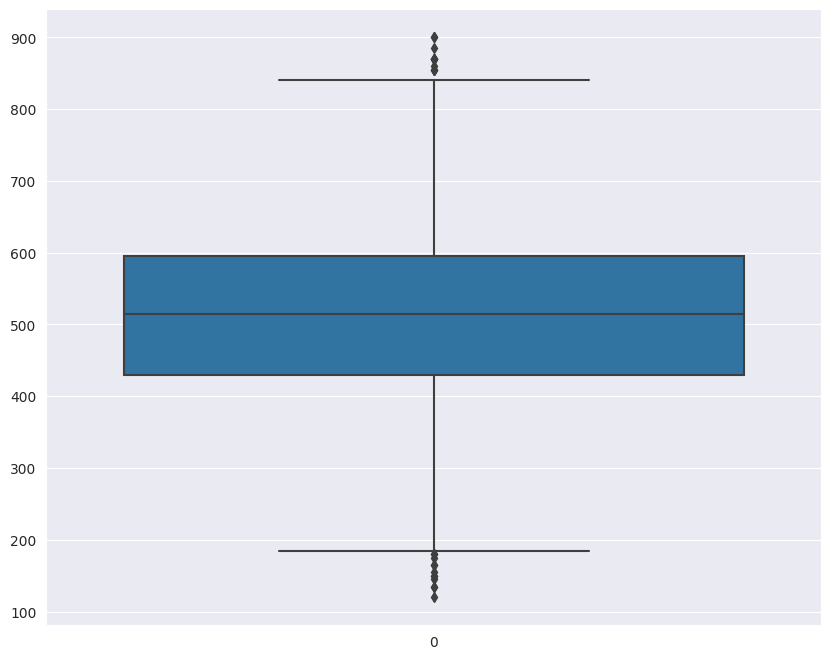

In [64]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Quant'])

In [65]:
# Outliers
df['Quant'][(df['Quant']<190) | (df['Quant']>850)].reset_index()

index  Quant
0     195    870
1     522    165
2     564    180
3     698    860
4     783    180
5     899    870
6    1148    175
7    1310    870
8    1661    870
9    1815    135
10   2007    855
11   2134    145
12   2155    870
13   2411    885
14   2437    120
15   2490    900
16   2616    135
17   2932    165
18   2957    900
19   3165    855
20   3239    855
21   3258    150
22   3283    150
23   3544    185
24   3616    155

## Logical Column

<Axes: >

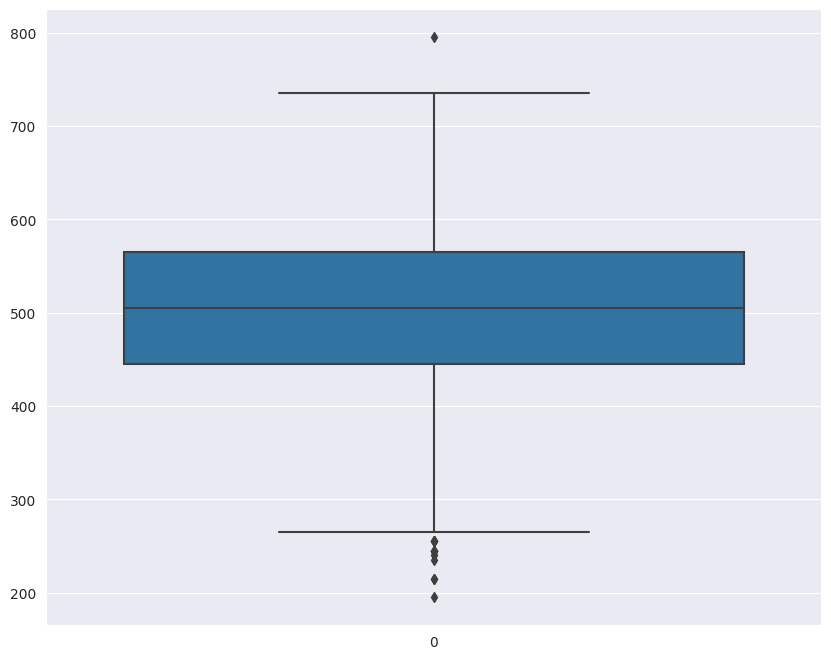

In [66]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Logical'])

In [67]:
# Outliers
df['Logical'][(df['Logical']<260) | (df['Logical']>790)].reset_index()

index  Logical
0     101      255
1     207      245
2     345      215
3     628      215
4    1014      795
5    1160      255
6    2141      255
7    2265      255
8    2796      240
9    2830      195
10   2891      245
11   3119      245
12   3159      245
13   3876      235
14   3953      245

## Domain Column

<Axes: >

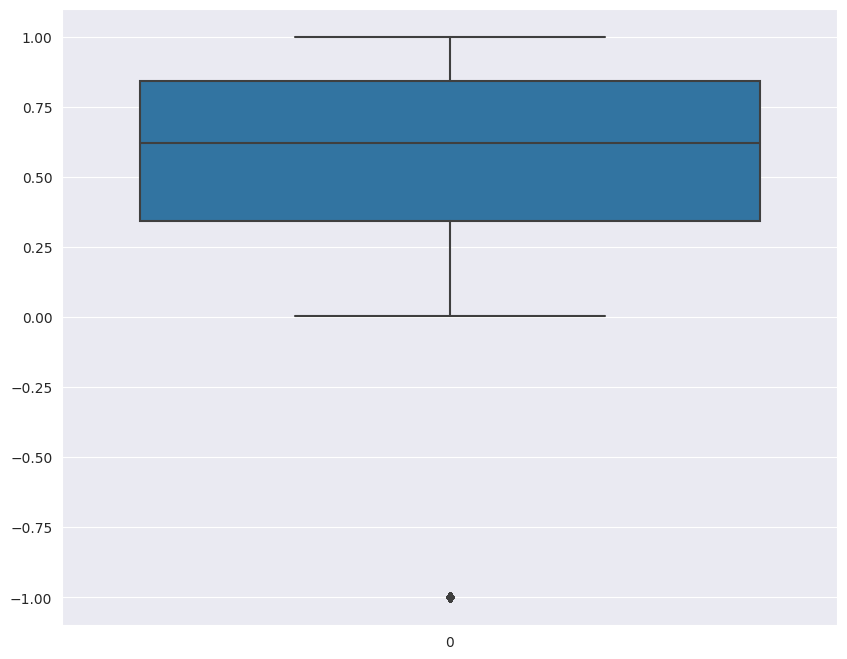

In [68]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Domain'])

In [69]:
# Outliers
df['Domain'][df['Domain'] <= -1].value_counts().reset_index()

index  Domain
0   -1.0     234

## Computer Programming

<Axes: >

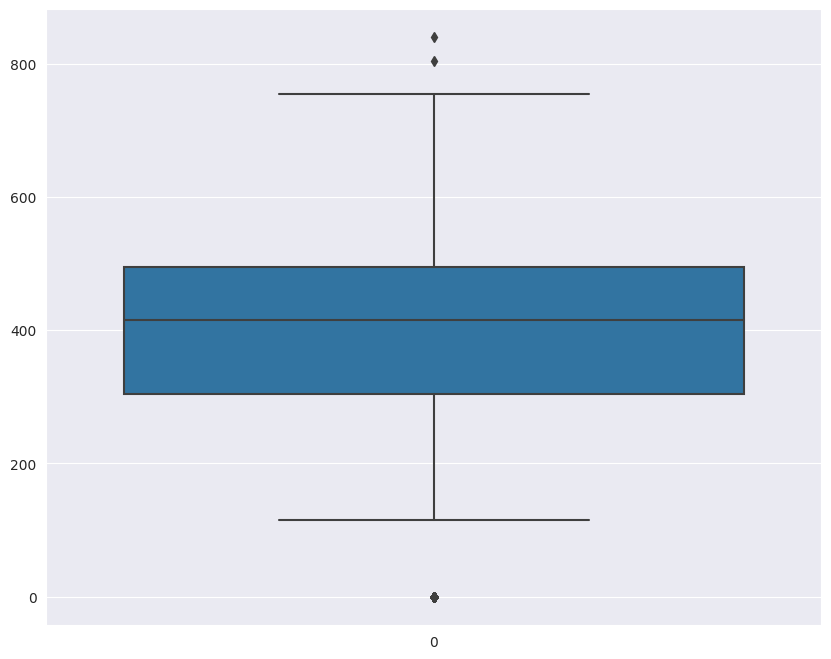

In [70]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ComputerProgramming'])

In [71]:
# Outliers
df['ComputerProgramming'][df['ComputerProgramming'] > 800].reset_index()

index  ComputerProgramming
0     64                  804
1   1711                  840

## Electronics and semicon

<Axes: >

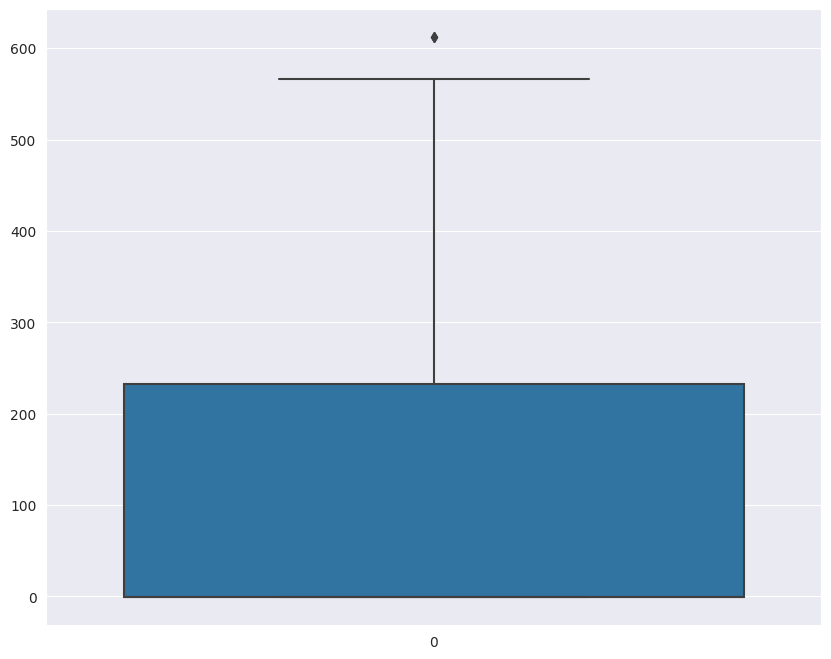

In [72]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ElectronicsAndSemicon'])

In [73]:
# Outliers
df['ElectronicsAndSemicon'][df['ElectronicsAndSemicon'] > 600].reset_index()

index  ElectronicsAndSemicon
0   1557                    612
1   3889                    612

## Computer Science

<Axes: >

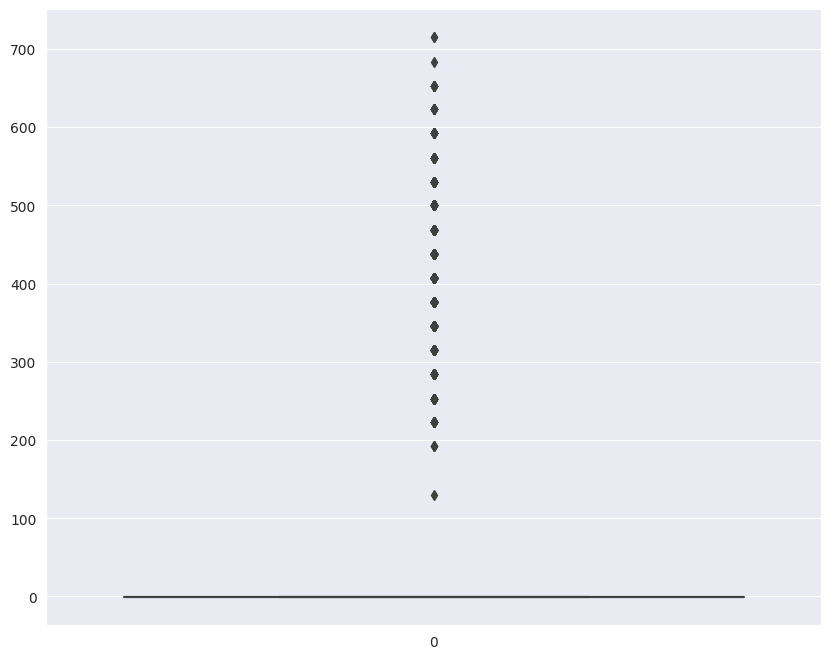

In [74]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ComputerScience'])

In [75]:
df['ComputerScience'][df['ComputerScience'] > 100].value_counts().reset_index()

index  ComputerScience
0     407              125
1     376              120
2     346              114
3     438              110
4     315               77
5     469               77
6     500               62
7     284               48
8     530               45
9     253               30
10    561               22
11    223               14
12    592               14
13    623               10
14    653                9
15    192                3
16    715                2
17    684                1
18    130                1

## Mechanical Engg

<Axes: >

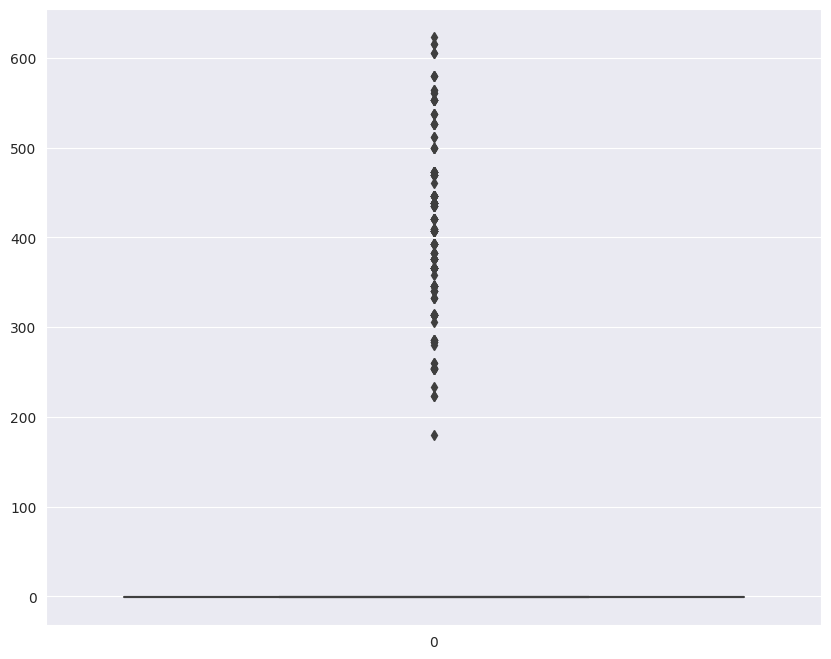

In [76]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['MechanicalEngg'])

In [77]:
df['MechanicalEngg'][df['MechanicalEngg'] > 170].value_counts().reset_index()

index  MechanicalEngg
0     366              18
1     446              15
2     438              15
3     313              13
4     407              12
5     376              12
6     346              11
7     393              11
8     420              10
9     473               9
10    469               8
11    553               8
12    383               6
13    435               6
14    340               5
15    526               5
16    409               5
17    500               4
18    253               4
19    286               4
20    254               3
21    580               3
22    538               3
23    332               3
24    284               3
25    223               2
26    606               2
27    564               2
28    616               2
29    512               2
30    260               2
31    561               2
32    315               1
33    358               1
34    233               1
35    306               1
36    461               1
37    180               1
38    280               1
39    623               1

## Electrical Engg

<Axes: >

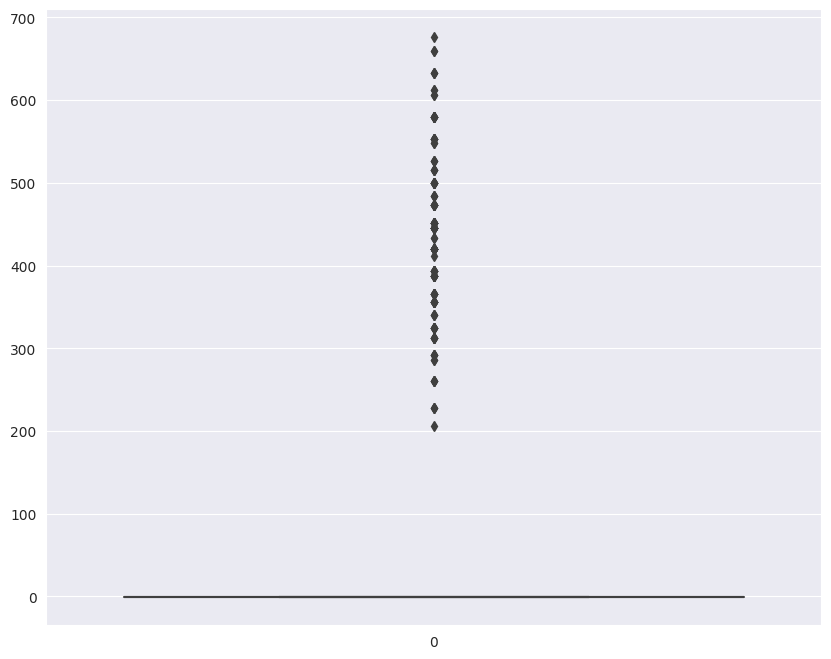

In [78]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ElectricalEngg'])

In [79]:
df['ElectricalEngg'][df['ElectricalEngg'] > 200].value_counts().reset_index()

index  ElectricalEngg
0     420              16
1     446              14
2     452              10
3     388              10
4     356               9
5     473               9
6     580               8
7     500               8
8     393               7
9     324               7
10    366               7
11    553               6
12    313               6
13    516               4
14    260               4
15    292               4
16    340               3
17    228               3
18    484               3
19    526               3
20    633               3
21    548               2
22    433               2
23    606               2
24    660               2
25    286               2
26    612               2
27    676               1
28    411               1
29    206               1

## TelecomEngg

<Axes: >

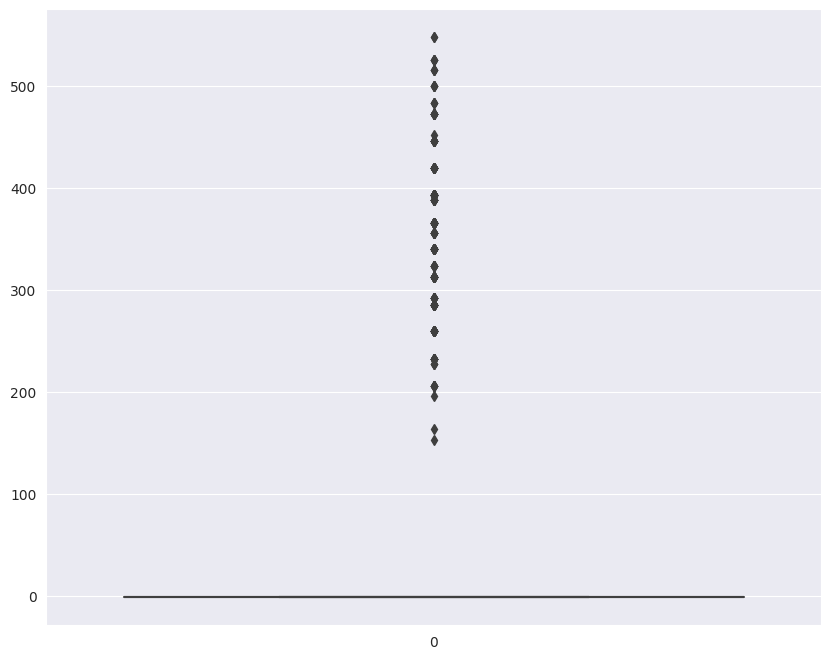

In [80]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['TelecomEngg'])

In [81]:
df['TelecomEngg'][df['TelecomEngg'] > 150].value_counts().reset_index()

index  TelecomEngg
0     393           42
1     366           42
2     260           34
3     340           31
4     313           30
5     286           29
6     420           24
7     446           15
8     388           14
9     473           13
10    233           13
11    356           12
12    292           12
13    324           10
14    206            8
15    500            5
16    526            5
17    516            4
18    484            4
19    228            3
20    548            2
21    153            1
22    196            1
23    164            1
24    452            1

# **Bivariate Analysis**

Finding the correlation between the features

In [82]:
df.corr()

Salary  10percentage  12graduation  12percentage  \
Salary                 1.000000      0.262972     -0.187267      0.255369   
10percentage           0.262972      1.000000      0.252321      0.639847   
12graduation          -0.187267      0.252321      1.000000      0.237981   
12percentage           0.255369      0.639847      0.237981      1.000000   
CollegeTier           -0.202183     -0.116447      0.027709     -0.095061   
collegeGPA             0.207050      0.328477      0.074335      0.369527   
CollegeCityTier        0.036715      0.131842      0.010565      0.147704   
GraduationYear        -0.014235     -0.014836      0.013380     -0.013640   
English                0.245853      0.345329      0.155241      0.209080   
Logical                0.236103      0.302076      0.099486      0.231231   
Quant                  0.346166      0.308809     -0.006383      0.306800   
Domain                 0.148602      0.070550     -0.035614      0.064279   
ComputerProgramming    0.151954      0.040242     -0.051596      0.069946   
ElectronicsAndSemicon  0.012496      0.090785      0.005216      0.123473   
ComputerScience       -0.140817     -0.030015      0.289195     -0.050758   
MechanicalEngg         0.025778      0.054145      0.043853      0.043385   
ElectricalEngg        -0.056463      0.078813      0.124686      0.064745   
TelecomEngg           -0.026615      0.050708      0.026518      0.044091   
CivilEngg              0.071667      0.033701      0.021224      0.013363   
conscientiousness     -0.068519      0.063208      0.095812      0.046356   
agreeableness          0.054149      0.131698      0.036115      0.093767   
extraversion          -0.028549     -0.006984      0.059037     -0.011223   
nueroticism           -0.050558     -0.130211     -0.079742     -0.089816   
openess_to_experience -0.015522      0.029176     -0.024979     -0.003420   

                       CollegeTier  collegeGPA  CollegeCityTier  \
Salary                   -0.202183    0.207050         0.036715   
10percentage             -0.116447    0.328477         0.131842   
12graduation              0.027709    0.074335         0.010565   
12percentage             -0.095061    0.369527         0.147704   
CollegeTier               1.000000   -0.094007        -0.104543   
collegeGPA               -0.094007    1.000000         0.044755   
CollegeCityTier          -0.104543    0.044755         1.000000   
GraduationYear           -0.005635    0.011182         0.008672   
English                  -0.176581    0.110588         0.052801   
Logical                  -0.173017    0.206360         0.018582   
Quant                    -0.242722    0.231780         0.004794   
Domain                   -0.053177    0.112739         0.006830   
ComputerProgramming      -0.074102    0.130911         0.069203   
ElectronicsAndSemicon    -0.027981    0.024693         0.040336   
ComputerScience          -0.000829   -0.003422        -0.008193   
MechanicalEngg           -0.011911    0.005795        -0.047418   
ElectricalEngg            0.006117    0.045375         0.008672   
TelecomEngg              -0.003849   -0.008908         0.053317   
CivilEngg                -0.038903    0.000803        -0.034835   
conscientiousness         0.057542    0.058295         0.019670   
agreeableness            -0.034958    0.061320         0.006242   
extraversion              0.011176   -0.044320        -0.008191   
nueroticism               0.015827   -0.071504         0.001343   
openess_to_experience    -0.016287    0.015255        -0.012935   

                       GraduationYear   English   Logical  ...  \
Salary                      -0.014235  0.245853  0.236103  ...   
10percentage                -0.014836  0.345329  0.302076  ...   
12graduation                 0.013380  0.155241  0.099486  ...   
12percentage                -0.013640  0.209080  0.231231  ...   
CollegeTier                 -0.005635 -0.176581 -0.173017  ...   
collegeGPA                 

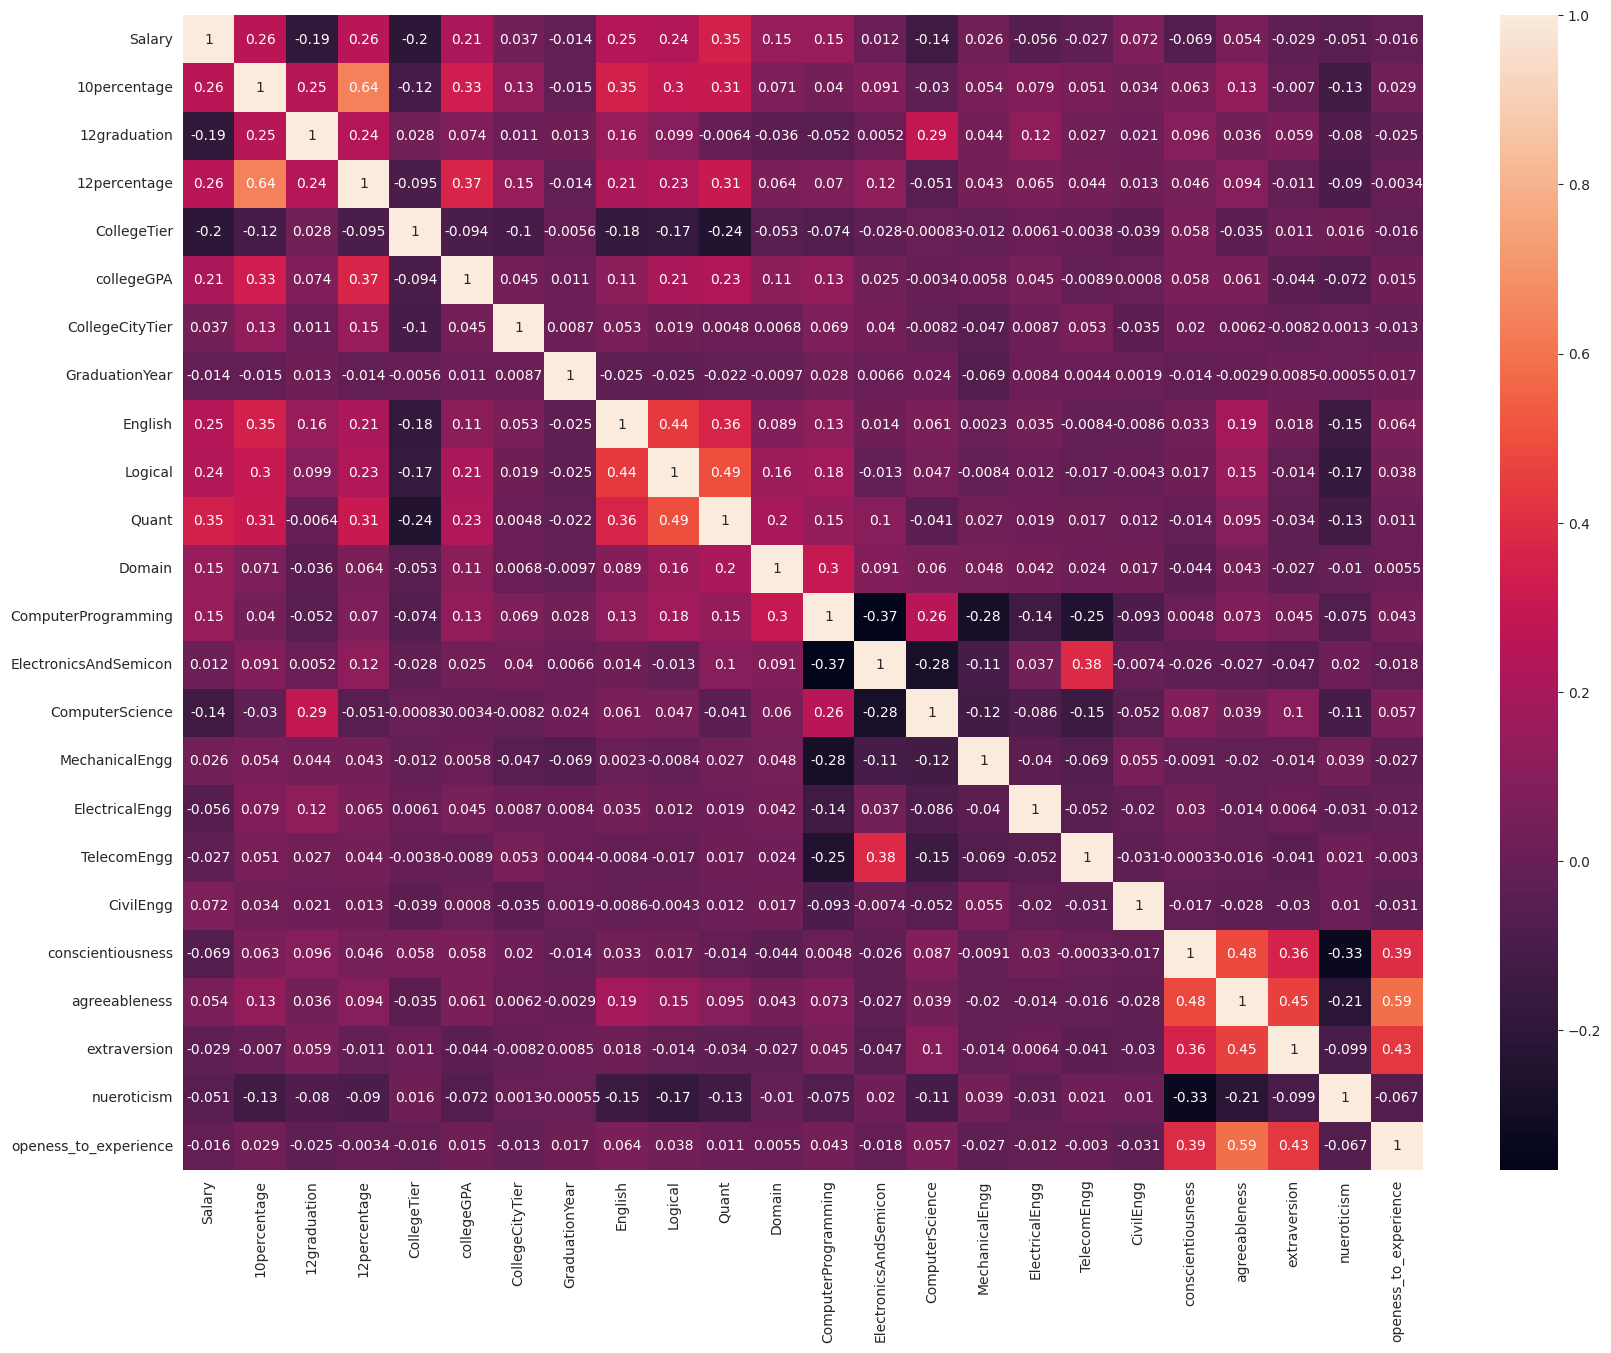

In [83]:
#Heat Map
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() , annot=True)
plt.show()

From the about heat map we can say that 10percentage and 12 percentage are positively correlated and English, logical and quant are also postitively correlated

<Figure size 2000x1500 with 0 Axes>

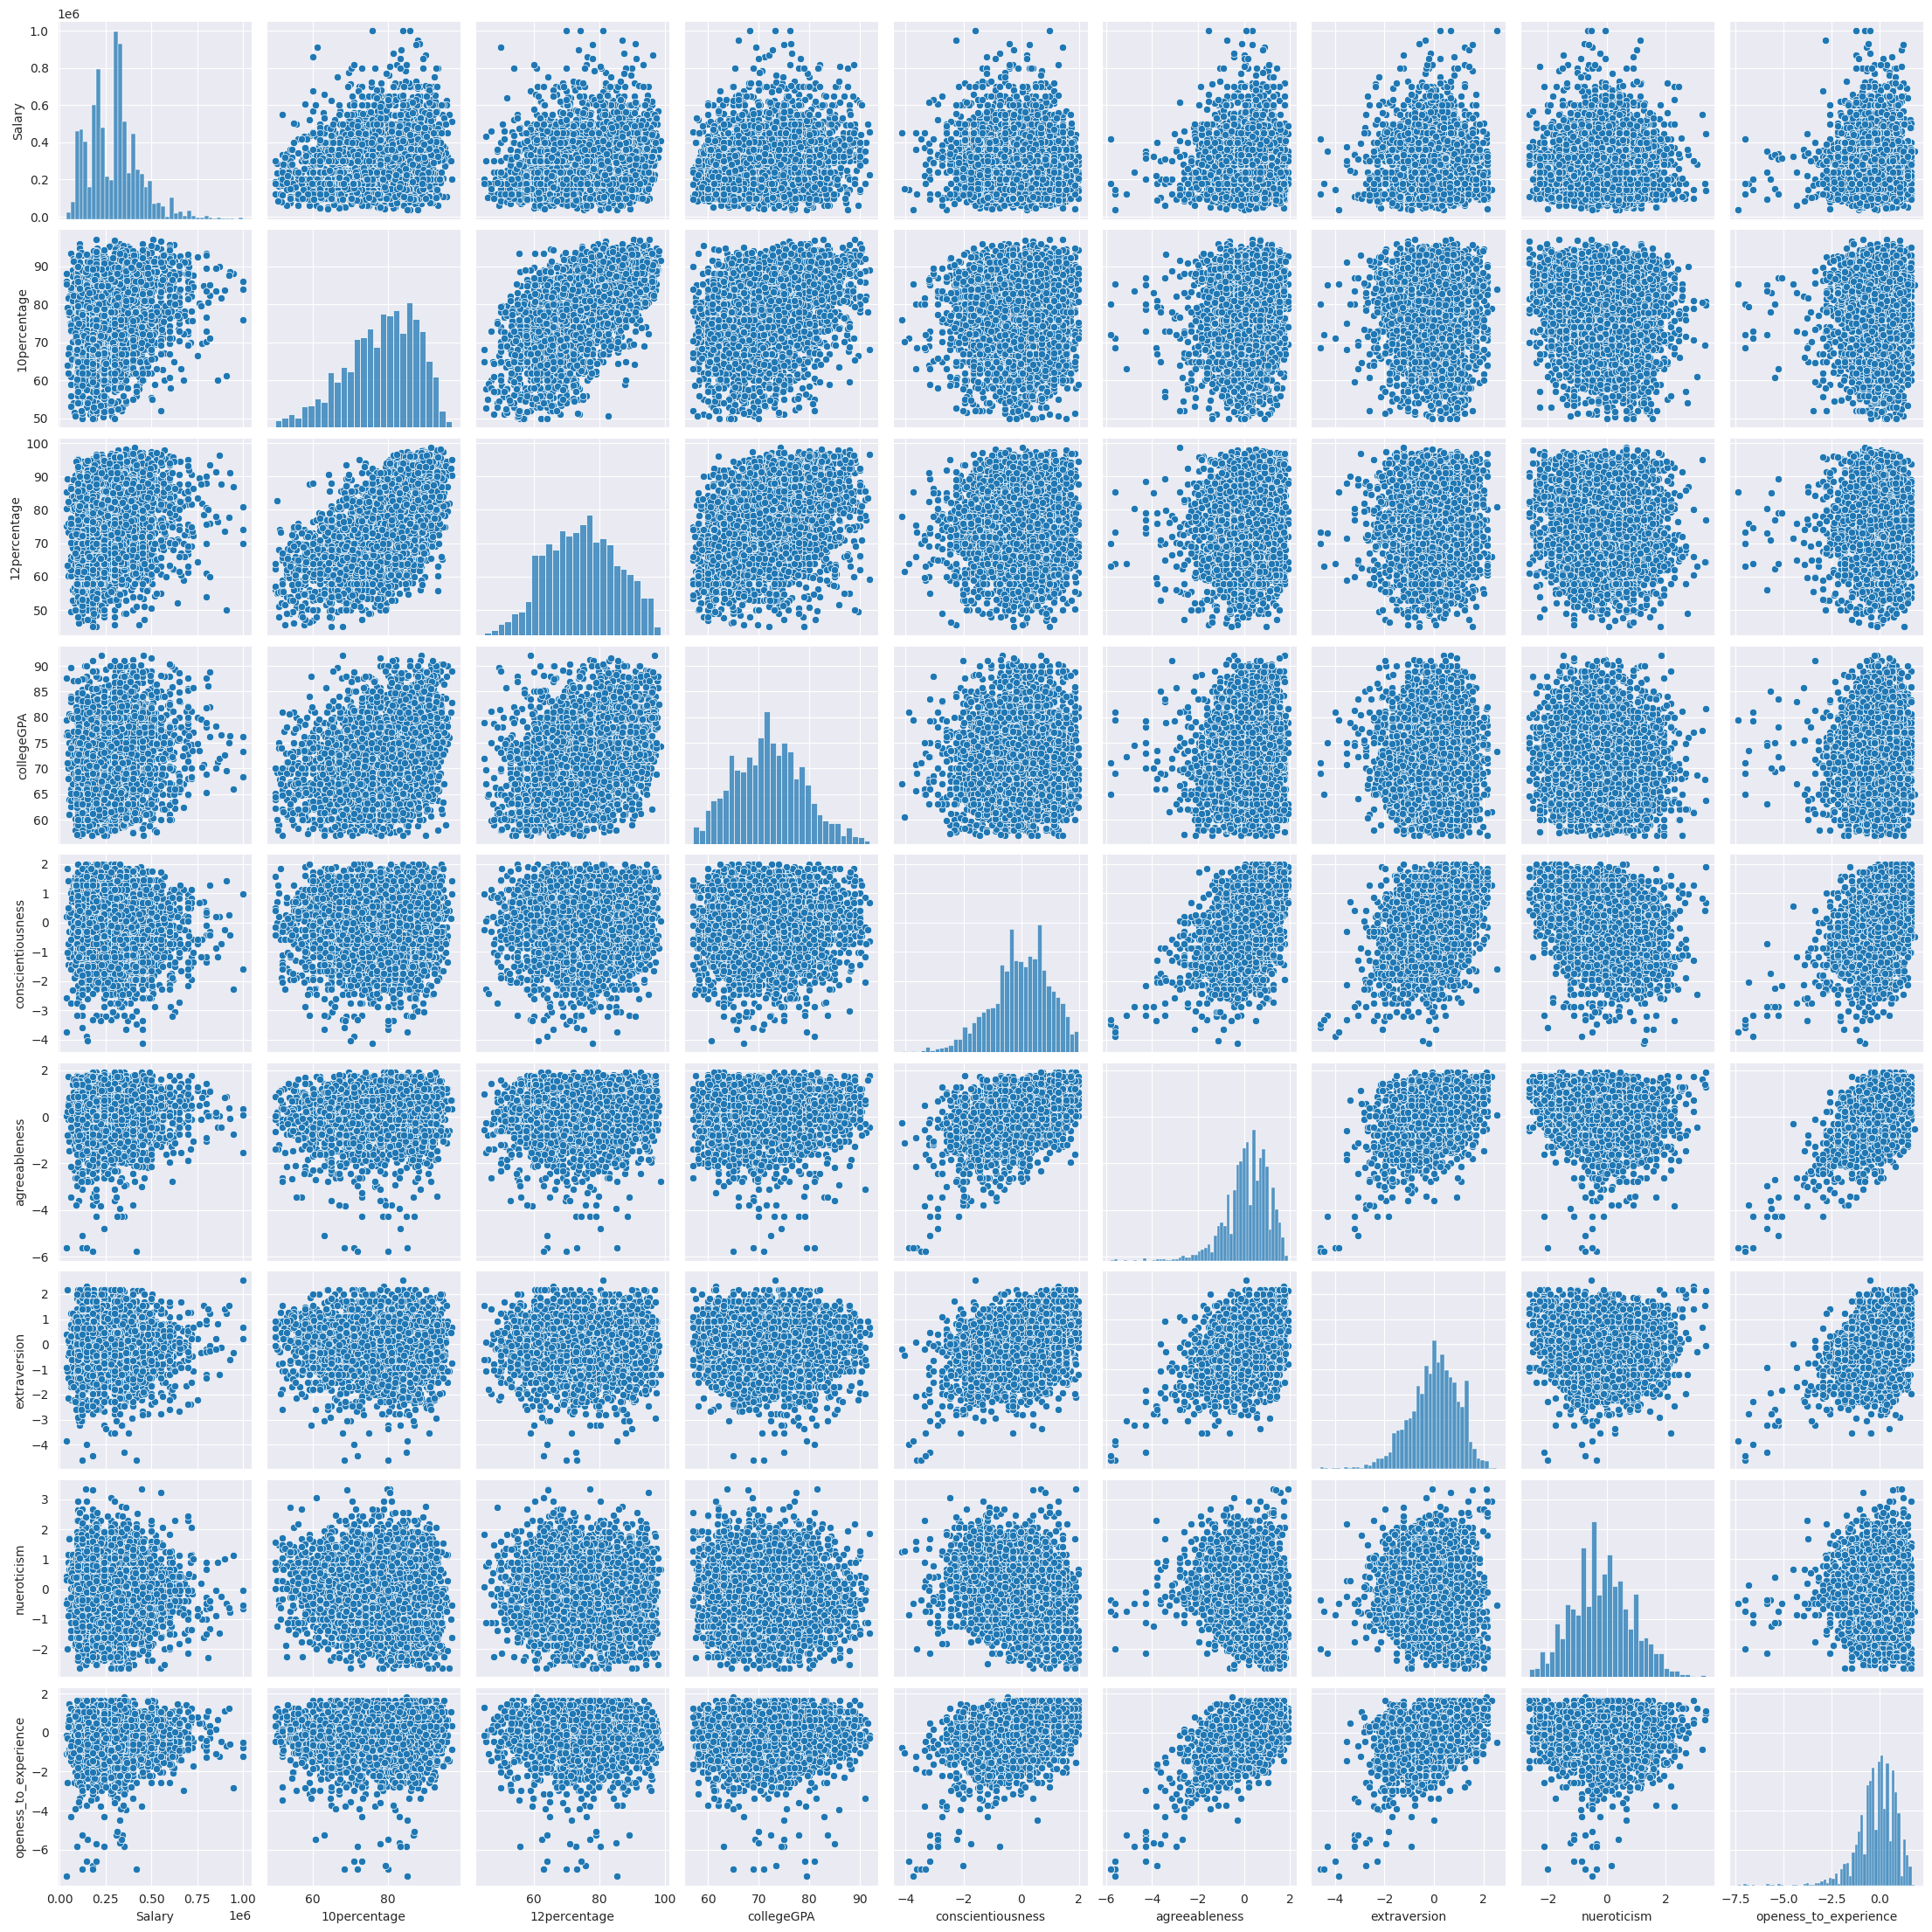

In [84]:
#Pairplot
plt.figure(figsize=(20,15))
data = df[['Salary','10percentage','12percentage','collegeGPA', 'conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]
sns.pairplot(data)
plt.show()

<Axes: xlabel='10percentage', ylabel='12percentage'>

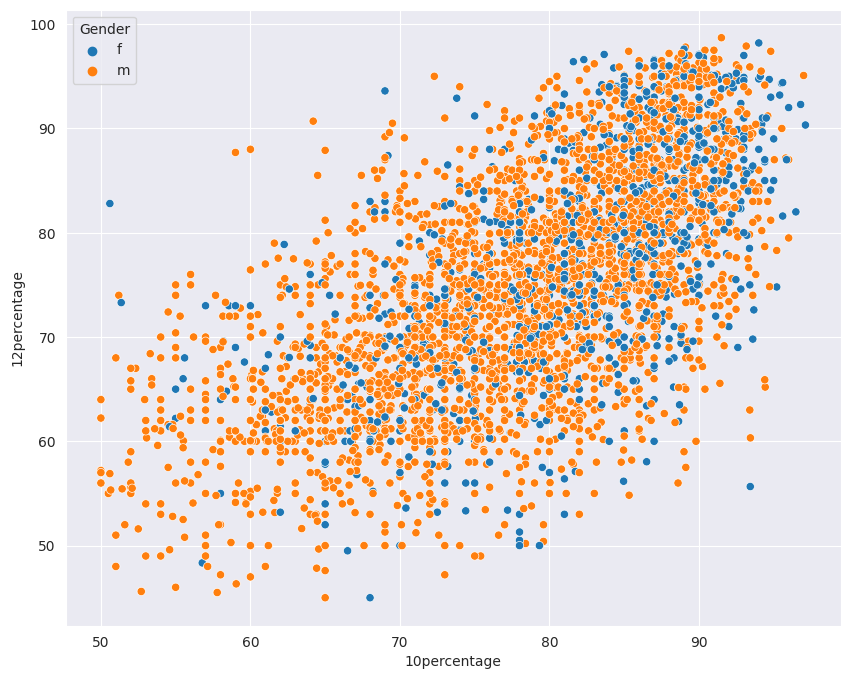

In [85]:
#Statterplot
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="10percentage", y="12percentage",hue="Gender")

# **Research Question**
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

## Hypothesis Testing

In [86]:
df.head()

Salary        DOJ                  DOL              Designation    JobCity  \
0  420000 2012-06-01              present  senior quality engineer  Bangalore   
1  500000 2013-09-01              present        assistant manager     Indore   
2  325000 2014-06-01              present         systems engineer    Chennai   
4  200000 2014-03-01  2015-03-01 00:00:00                      get    Manesar   
5  300000 2014-06-01              present          system engineer  Hyderabad   

  Gender        DOB  10percentage  12graduation  12percentage  ...  \
0      f 1990-02-19         84.30          2007          95.8  ...   
1      m 1989-10-04         85.40          2007          85.0  ...   
2      f 1992-08-03         85.00          2010          68.2  ...   
4      m 1991-02-27         78.00          2008          76.8  ...   
5      m 1992-07-02         89.92          2010          87.0  ...   

   ComputerScience MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1             -1             -1           -1         -1   
1               -1             -1             -1           -1         -1   
2               -1             -1             -1           -1         -1   
4               -1             -1             -1           -1         -1   
5              407             -1             -1           -1         -1   

  conscientiousness  agreeableness  extraversion  nueroticism  \
0            0.9737         0.8128        0.5269      1.35490   
1           -0.7335         0.3789        1.2396     -0.10760   
2            0.2718         1.7109        0.1637     -0.86820   
4           -0.8810        -0.2793       -1.0697      0.09163   
5           -0.3027        -0.6201       -2.2954     -0.74150   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
4                -0.1295  
5                -0.8608  

[5 rows x 33 columns]

In [87]:
df[['Designation','Specialization']][df['Designation']=='hardware engineer']

Designation                             Specialization
197   hardware engineer                     electrical engineering
802   hardware engineer  electronics and communication engineering
839   hardware engineer  electronics and communication engineering
1886  hardware engineer  electronics and communication engineering
2533  hardware engineer  electronics and communication engineering
3438  hardware engineer                    electronics engineering
3547  hardware engineer  electronics and communication engineering

In [88]:
print('Average Salary :')
print('Programmer Analyst :',round(df['Salary'][(df['GraduationYear']==2014) & (df['Designation']=='programmer analyst') & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Software Engineer :',round(df['Salary'][(df['GraduationYear']==2014) & (df['Designation']=='software engineer')  & (df['Specialization']=='computer science & engineering')].mean(),2))
print('Hardware Engineer :',round(df['Salary'][(df['GraduationYear']==2014) &(df['Designation']=='hardware engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Associate Engineer :',round(df['Salary'][(df['GraduationYear']==2014) &(df['Designation']=='associate engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))

Average Salary :
Programmer Analyst : 301666.67
Software Engineer : 337413.79
Hardware Engineer : nan
Associate Engineer : 332500.0


In [89]:
sample = [3.16,3.6,0,3.5]
sample = np.array(sample)

In [90]:
# Necessary variables initialization ex- sample mean
sample_size = len(sample)
sample_mean = np.mean(sample)
sample_mean

2.565

In [91]:
# Sample Standard Devation
import math
sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / 3)
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 1.7203391138571102


In [92]:
# Calulating T-Score
def t_score(pop_mean, sample_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / (sample_size**0.5)
    return numerator / denomenator

In [93]:
# Necessary variables initialization ex- sample mean,population mean
pop_mean = 2.75
sample_mean = 3.34
sample_std = 0.21
sample_size = 4

In [94]:
# Calling T-score Function
t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : 5.619047619047618


In [95]:
# Two Tail - Deciding the Significance Level & Calculating the t-critical value
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha/2, df = 3)
print('t_critical :', t_critical)

t_critical : 3.182446305284263


t_critical_left : 2.4158431379451524
t_critical_right : 3.0841568620548476


Text(3.34, 0.1, 'x_bar')

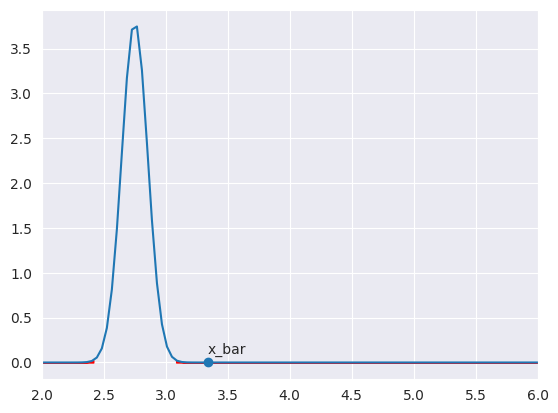

In [96]:
# Visualizing the Sampling Distribution with Rejection Regions
from scipy.stats import norm
# Defining the x min & x max
x_min = 2
x_max =6

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values of Two tailed Test
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

print('t_critical_left :', t_critical_left)
print('t_critical_right :', t_critical_right)

# Shading the left rejection region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [98]:
if np.abs(t_sc) > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [99]:
# Conclusion using p-test
p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  1.9201293444126577e-08
Reject Null Hypothesis


### Is there a relationship between gender and specialisation?

<Figure size 1000x1000 with 0 Axes>

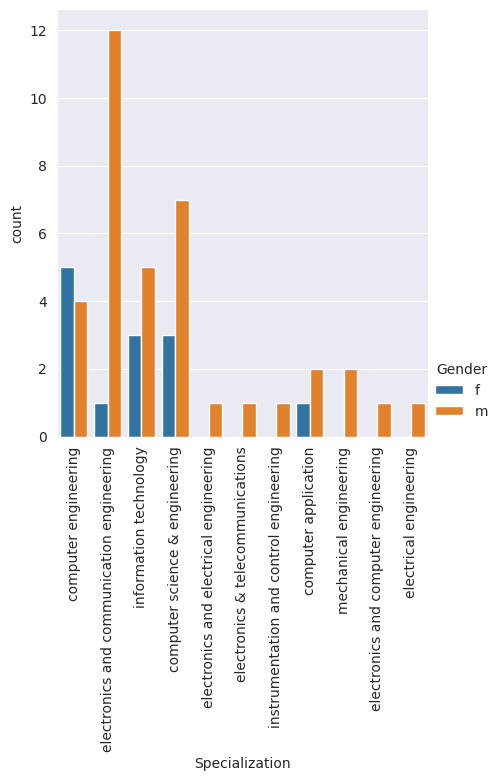

In [109]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Specialization",hue="Gender",data = df[:50],kind='count')
plt.xticks(rotation=90)
plt.show() 

In [111]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

In [115]:
# Perform statistical analysis
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p)

Chi-square statistic: 99.11531504543815
P-value: 3.942785429403184e-06




1.   As the p value is lesser than the signification value we reject the null Hypothesis
2. There is a relationship between gender and specialization 



# Feature Transformation

### Column Standardization for Numerical Features:

In [116]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [118]:
# Standardizing Salary Column
scaled_sal = scaler.fit_transform(df['Salary'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_sal[:20])

[[0.39896373]
 [0.48186528]
 [0.30051813]
 [0.17098446]
 [0.2746114 ]
 [0.2746114 ]
 [0.58549223]
 [0.20207254]
 [0.58549223]
 [0.43005181]
 [0.24352332]
 [0.17098446]
 [0.2746114 ]
 [0.32642487]
 [0.30051813]
 [0.22279793]
 [0.0880829 ]
 [0.30051813]
 [0.29533679]
 [0.17098446]]


In [119]:
# Standardizing 10th percent Column
scaled_10 = scaler.fit_transform(df['10percentage'].values.reshape(-1,1))
print(scaled_10[:20])

[[0.72792869]
 [0.75127334]
 [0.74278438]
 [0.5942275 ]
 [0.84719864]
 [0.76570458]
 [0.84889643]
 [0.57300509]
 [0.81918506]
 [0.65789474]
 [0.71307301]
 [0.22920204]
 [0.66213922]
 [0.41468591]
 [0.75976231]
 [0.22920204]
 [0.31833616]
 [0.61544992]
 [0.87436333]
 [0.54477929]]


In [120]:
# Standardizing 12th percent Column
scaled_12 = scaler.fit_transform(data['12percentage'].values.reshape(-1,1))
print(scaled_12[:20])

[[0.94599628]
 [0.74487896]
 [0.4320298 ]
 [0.59217877]
 [0.78212291]
 [0.41899441]
 [0.8603352 ]
 [0.50651769]
 [0.72067039]
 [0.76350093]
 [0.46238361]
 [0.32402235]
 [0.64990689]
 [0.36182495]
 [0.55493482]
 [0.40335196]
 [0.36871508]
 [0.32029795]
 [0.73798883]
 [0.54748603]]


## Column Standardization for Categorical Features:

In [121]:
# One-hot Encoding of Gender column
dummies = pd.get_dummies(df[['Gender']])
dummies

Gender_f  Gender_m
0            1         0
1            0         1
2            1         0
4            0         1
5            0         1
...        ...       ...
3993         0         1
3994         1         0
3995         0         1
3996         1         0
3997         1         0

[3836 rows x 2 columns]

In [122]:
df1 = pd.concat([df,dummies],axis='columns')
df1.head()

Salary        DOJ                  DOL              Designation    JobCity  \
0  420000 2012-06-01              present  senior quality engineer  Bangalore   
1  500000 2013-09-01              present        assistant manager     Indore   
2  325000 2014-06-01              present         systems engineer    Chennai   
4  200000 2014-03-01  2015-03-01 00:00:00                      get    Manesar   
5  300000 2014-06-01              present          system engineer  Hyderabad   

  Gender        DOB  10percentage  12graduation  12percentage  ...  \
0      f 1990-02-19         84.30          2007          95.8  ...   
1      m 1989-10-04         85.40          2007          85.0  ...   
2      f 1992-08-03         85.00          2010          68.2  ...   
4      m 1991-02-27         78.00          2008          76.8  ...   
5      m 1992-07-02         89.92          2010          87.0  ...   

   ElectricalEngg TelecomEngg CivilEngg  conscientiousness  agreeableness  \
0              -1          -1        -1             0.9737         0.8128   
1              -1          -1        -1            -0.7335         0.3789   
2              -1          -1        -1             0.2718         1.7109   
4              -1          -1        -1            -0.8810        -0.2793   
5              -1          -1        -1            -0.3027        -0.6201   

  extraversion  nueroticism  openess_to_experience  Gender_f  Gender_m  
0       0.5269      1.35490                -0.4455         1         0  
1       1.2396     -0.10760                 0.8637         0         1  
2       0.1637     -0.86820                 0.6721         1         0  
4      -1.0697      0.09163                -0.1295         0         1  
5      -2.2954     -0.74150                -0.8608         0         1  

[5 rows x 35 columns]

In [123]:
finaldf = df1.drop(['Gender','Gender_f'],axis='columns')
finaldf

Salary        DOJ                  DOL                  Designation  \
0     420000 2012-06-01              present      senior quality engineer   
1     500000 2013-09-01              present            assistant manager   
2     325000 2014-06-01              present             systems engineer   
4     200000 2014-03-01  2015-03-01 00:00:00                          get   
5     300000 2014-06-01              present              system engineer   
...      ...        ...                  ...                          ...   
3993  280000 2011-10-01  2012-10-01 00:00:00            software engineer   
3994  100000 2013-07-01  2013-07-01 00:00:00             technical writer   
3995  320000 2013-07-01              present  associate software engineer   
3996  200000 2014-07-01  2015-01-01 00:00:00           software developer   
3997  400000 2013-02-01              present      senior systems engineer   

               JobCity        DOB  10percentage  12graduation  12percentage  \
0            Bangalore 1990-02-19         84.30          2007         95.80   
1               Indore 1989-10-04         85.40          2007         85.00   
2              Chennai 1992-08-03         85.00          2010         68.20   
4              Manesar 1991-02-27         78.00          2008         76.80   
5            Hyderabad 1992-07-02         89.92          2010         87.00   
...                ...        ...           ...           ...           ...   
3993        New Delhi  1987-04-15         52.09          2006         55.50   
3994         Hyderabad 1992-08-27         90.00          2009         93.00   
3995         Bangalore 1991-07-03         81.86          2008         65.50   
3996  Asifabadbanglore 1992-03-20         78.72          2010         69.88   
3997           Chennai 1991-02-26         70.60          2008         68.00   

      CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               2  ...             -1             -1           -1         -1   
1               2  ...             -1             -1           -1         -1   
2               2  ...             -1             -1           -1         -1   
4               2  ...             -1             -1           -1         -1   
5               2  ...             -1             -1           -1         -1   
...           ...  ...            ...            ...          ...        ...   
3993            2  ...             -1             -1           -1         -1   
3994            2  ...             -1             -1           -1         -1   
3995            2  ...             -1             -1           -1         -1   
3996            2  ...             -1             -1           -1         -1   
3997            2  ...             -1             -1           -1         -1   

     conscientiousness  agreeableness  extraversion  nueroticism  \
0               0.9737         0.8128        0.5269      1.35490   
1              -0.7335         0.3789        1.2396     -0.10760   
2               0.2718         1.7109        0.1637     -0.86820   
4              -0.8810        -0.2793       -1.0697      0.09163   
5              -0.3027        -0.6201       -2.2954     -0.74150   
...                ...            ...           ...          ...   
3993           -0.1082         0.3448        0.2366      0.64980   
3994           -0.3027         0.8784        0.9322      0.77980   
3995           -1.5765        -1.5273       -1.5051     -1.31840   
3996           -0.1590         0.0459       -0.4511     -0.36120   
3997           -1.1128        -0.2793       -0.6343      1.32553   

      openess_to_experience  Gender_m  
0                   -0.4455         0  
1                    0.8637         1  
2                    0.6721         0  
4                   -0.1295         1  
5                   -0.8608         1  
...                     ...       ...  
3993                -0.9194         1  
3994                -0.0943       